In [1]:
from datasets import load_dataset
import pandas as pd
import ast
import matplotlib.pyplot as plt

c:\Users\maitp\anaconda3\envs\PYTHON_PROJECT_1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading up data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

In [3]:
# Cleaning up data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])


def convert_to_list(job_skill):
    if isinstance(job_skill, (list, type(None))):
        return job_skill
    try:
        return ast.literal_eval(job_skill)
    except ValueError:
        return job_skill


df["job_skills"] = df["job_skills"].apply(convert_to_list)

In [4]:
df_DA = df.loc[df["job_title_short"] == "Data Analyst"].copy()
df_DA["job_posted_month_no"] = df_DA["job_posted_date"].dt.month
df_DA["job_posted_month"] = df_DA["job_posted_date"].dt.strftime("%b")
df_DA = df_DA.explode("job_skills")

In [5]:
df_DA_pivot = df_DA.pivot_table(
    index=["job_posted_month_no", "job_posted_month"],
    columns="job_skills",
    aggfunc="size",  # Why using "count" gives a different result with different no. of columns?
    fill_value=0,
)
df_DA_pivot.reset_index(level=0, inplace=True, drop=True)
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
Feb,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
Mar,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
Apr,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
May,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
Jun,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
Jul,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
Aug,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
Sep,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [6]:
# Adding a total row
df_DA_pivot.loc["All"] = df_DA_pivot.sum()
# Sorting total row descending then get the corresponding index range
df_DA_pivot.loc["All"].sort_values(ascending=False).index

Index(['sql', 'excel', 'python', 'tableau', 'power bi', 'r', 'sas',
       'powerpoint', 'word', 'sap',
       ...
       'angular.js', 'xamarin', 'gtx', 'nuxt.js', 'ovh', 'esquisse', 'suse',
       'capacitor', 'chainer', 'msaccess'],
      dtype='object', name='job_skills', length=235)

In [ ]:
# Subsetting the pivot table using the index range above
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc["All"].sort_values(ascending=False).index]
df_DA_pivot.drop("All", inplace=True)  # Why SettingWithCopyWarning raised?

C:\Users\Trinh Phuong Mai\AppData\Local\Temp\ipykernel_13552\1188442029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA_pivot.drop("All", inplace=True)


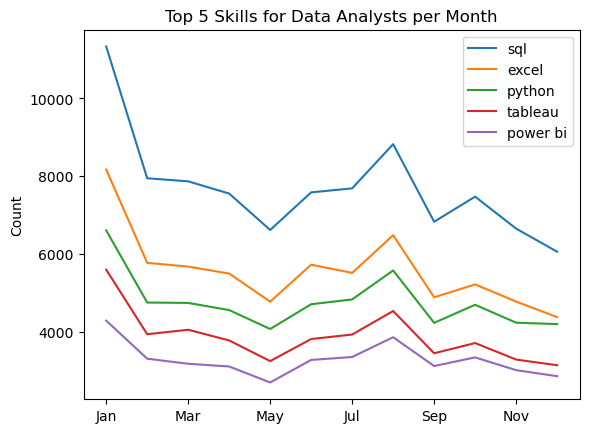

In [8]:
# Plotting the top 5 skills
df_DA_pivot.iloc[:, :5].plot(
    kind="line",
    xlabel="",
    ylabel="Count",
    title="Top 5 Skills for Data Analysts per Month",
)
plt.legend()